In [ ]:
### Part 1: Importance of Weight Initialization

#### 1) Importance of Weight Initialization

**Weight initialization** is crucial in artificial neural networks for several reasons:
- **Ensuring Symmetry Breaking**: Proper weight initialization ensures that neurons learn different features. If weights are 
    initialized to the same values, all neurons in a layer will produce the same output and gradients, leading to redundant 
    learning and ineffective training.
- **Stabilizing Training**: It helps in maintaining the stability of gradients during backpropagation. Properly initialized 
    weights prevent the gradients from becoming too small (vanishing gradients) or too large (exploding gradients).
- **Speeding Up Convergence**: Well-initialized weights can significantly speed up the convergence of the training process by 
    starting the model closer to the optimal solution.



In [ ]:
#### 2) Challenges with Improper Weight Initialization

Improper weight initialization can cause several issues:
- **Vanishing Gradients**: If the initial weights are too small, the gradients during backpropagation can become very small, 
    making the weight updates negligible and slowing down or even stalling the training process.
- **Exploding Gradients**: If the initial weights are too large, the gradients can grow exponentially during backpropagation, 
    causing numerical instability and potentially leading to overflow.
- **Poor Convergence**: Improper initialization can lead to poor convergence, where the model either converges too slowly or 
    converges to suboptimal solutions.



In [ ]:
#### 3) Variance and Weight Initialization

Variance of weights is crucial because it affects the output distribution of each layer:
- **Preserving Signal Variance**: When passing inputs through a network, it’s important to maintain the variance of the signals 
    to prevent them from diminishing (vanishing gradients) or growing excessively (exploding gradients).
- **Maintaining Gradient Flow**: Proper variance ensures that the gradients maintain their magnitude during backpropagation, 
    facilitating effective weight updates.



In [ ]:
### Part 2: Weight Initialization Techniques

#### 4) Zero Initialization

**Zero initialization** involves setting all weights to zero:
- **Potential Limitations**: All neurons in a layer will produce the same output and receive the same gradient, leading to 
    symmetric learning and making different neurons redundant.
- **When Appropriate**: It can be used for initializing biases, but not weights.



In [ ]:
#### 5) Random Initialization

**Random initialization** involves setting weights to small random values:
- **Mitigating Issues**: To mitigate saturation and vanishing/exploding gradients, weights can be drawn from a distribution 
    with a specific variance. Common approaches include using normal or uniform distributions.
- **Adjustments**: Scaling the random values according to the number of input neurons (fan-in) or output neurons (fan-out) can 
    help maintain signal and gradient magnitudes.



In [ ]:
#### 6) Xavier/Glorot Initialization

**Xavier/Glorot initialization** addresses the challenges of improper weight initialization:
- **Theory**: It ensures that the variance of the inputs and outputs of each layer are maintained. Weights are drawn from a 
    distribution with variance \(2 / (fan\_in + fan\_out)\).
- **Implementation**: For a layer with \( n_{in} \) inputs and \( n_{out} \) outputs, weights are initialized using 
   
- **Benefits**: This method maintains the variance of activations and gradients across layers, promoting stable and faster 
    convergence.



In [ ]:
#### 7) He Initialization

**He initialization** is similar to Xavier but tailored for activation functions like ReLU:
- **Difference from Xavier**: He initialization uses a variance of \( 2 / n_{in} \) instead of \( 2 / (n_{in} + n_{out}) \), 
    focusing solely on the number of input units.
- **Formula**: For a layer with \( n_{in} \) inputs, weights are initialized using \( \mathcal{N}(0, \frac{2}{n_{in}}) \) or 
    \( \mathcal{U}(-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}}) \).
- **Preference**: It is preferred for networks with ReLU or similar activation functions because it better maintains the 
    variance of activations, promoting effective training.



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, input_shape=(28, 28, 1)))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3, 3), kernel_initializer=initializer))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=initializer))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer=initializer))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, kernel_initializer=initializer))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, kernel_initializer=initializer))
    model.add(layers.Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [6]:
initializers_dict = {
    "zero": initializers.Zeros(),
    "random": initializers.RandomNormal(mean=0.0, stddev=0.05),
    "xavier": initializers.GlorotNormal(),
    "he": initializers.HeNormal()
}

history_dict = {}

for name, initializer in initializers_dict.items():
    print(f"\nTraining with {name} initialization\n{'='*40}")
    model = create_model(initializer)
    history = model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.2, verbose=1)
    history_dict[name] = history



Training with zero initialization
Epoch 1/2
375/375 [==============================] - 118s 312ms/step - loss: 2.3016 - accuracy: 0.1133 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 2/2
375/375 [==============================] - 162s 432ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060

Training with random initialization


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/2
327/375 [=========================>....] - ETA: 19s - loss: 0.3019 - accuracy: 0.9015

KeyboardInterrupt: 

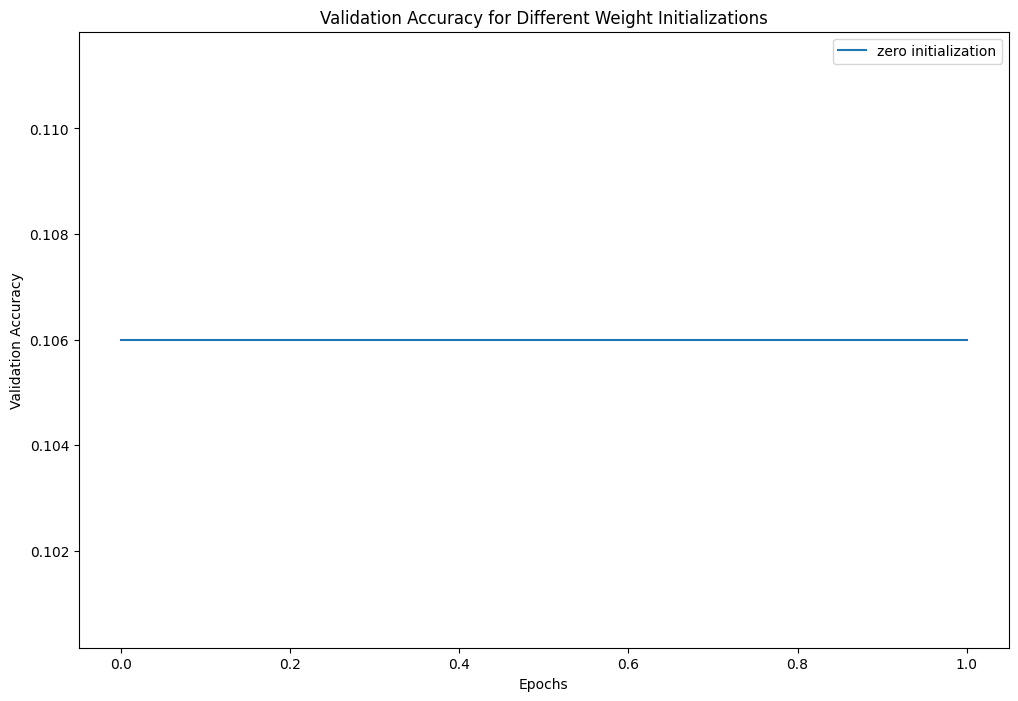

In [7]:
plt.figure(figsize=(12, 8))

for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} initialization')

plt.title('Validation Accuracy for Different Weight Initializations')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
